## Project 1
### Churn Prediction

#### Dataset: Telco: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.options.display.max_columns = 22

### 1.- EDA

#### General introduction to the data:

In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Total charges are strings and includes whitespaces. Let's do a little cleaning:

In [7]:
df.TotalCharges.iloc[0]

'29.85'

In [8]:
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.TotalCharges.replace(' ', np.nan, inplace=True)

In [10]:
df.TotalCharges = df.TotalCharges.astype(float)

In [11]:
df.dropna(inplace=True)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Train Val Test splits 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=19)
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=19)

In [15]:
len(df_train), len(df_val), len(df_test)

(4218, 1407, 1407)

#### First insights:
1.- Selected categorical Variables 

In [16]:
df_train['Churn'].value_counts()

No     3096
Yes    1122
Name: Churn, dtype: int64

In [17]:
df_train['gender'].value_counts()

Male      2138
Female    2080
Name: gender, dtype: int64

In [18]:
df_train['SeniorCitizen'].value_counts()

0    3545
1     673
Name: SeniorCitizen, dtype: int64

In [19]:
df_train['Partner'].value_counts()

No     2212
Yes    2006
Name: Partner, dtype: int64

In [20]:
df_train['Dependents'].value_counts()

No     3005
Yes    1213
Name: Dependents, dtype: int64

In [21]:
df_train['Contract'].value_counts()

Month-to-month    2340
Two year          1011
One year           867
Name: Contract, dtype: int64

In [22]:
df_train['TechSupport'].value_counts()

No                     2093
Yes                    1207
No internet service     918
Name: TechSupport, dtype: int64

2.- Including Churn

In [23]:
df_train.Churn = (df_train.Churn == 'Yes').astype(int)
df_val.Churn = (df_val.Churn == 'Yes').astype(int)
df_test.Churn = (df_test.Churn == 'Yes').astype(int)

In [24]:
list(df_train.select_dtypes(object).columns)

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [25]:
cat_vars = list(df_train.select_dtypes(object).columns) + ['SeniorCitizen']

In [26]:
cat_vars.remove('customerID')

In [27]:
cat_vars 

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [28]:
# Since the churn values are 0 or 1, the mean of the churn indicates the relationship of churn = 1 with the label of each category
for var in cat_vars:
    print(df_train.groupby(by=var).Churn.agg(['mean']))

            mean
gender          
Female  0.269231
Male    0.262862
             mean
Partner          
No       0.331374
Yes      0.193918
                mean
Dependents          
No          0.309151
Yes         0.159110
                  mean
PhoneService          
No            0.276119
Yes           0.264937
                      mean
MultipleLines             
No                0.244968
No phone service  0.276119
Yes               0.287802
                     mean
InternetService          
DSL              0.196242
Fiber optic      0.413312
No               0.076253
                         mean
OnlineSecurity               
No                   0.414333
No internet service  0.076253
Yes                  0.150042
                         mean
OnlineBackup                 
No                   0.395174
No internet service  0.076253
Yes                  0.219512
                         mean
DeviceProtection             
No                   0.387271
No internet service  0.076253

#### Countinous data insights:
 1.- Tenure
 
 2.- Monthly charges
 
 3.- Total charges

In [29]:
import seaborn as sns

In [30]:
sns.set_style('darkgrid')

In [31]:
df_train[df_train.TechSupport == 'No internet service'].Churn.value_counts(normalize=True)

0    0.923747
1    0.076253
Name: Churn, dtype: float64

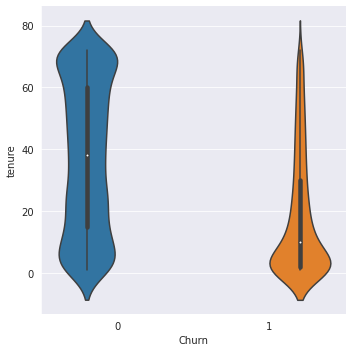

In [32]:
sns.catplot(data = df_train[['Churn', 'tenure']], kind='violin', y='tenure', x='Churn', hue='Churn')

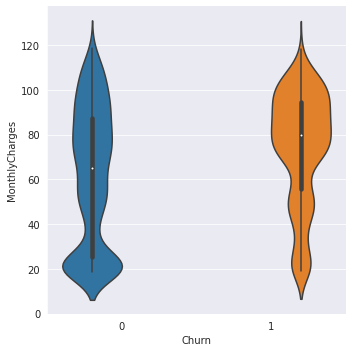

In [33]:
sns.catplot(data = df_train[['Churn', 'MonthlyCharges']], kind='violin', y='MonthlyCharges', x='Churn', hue='Churn')

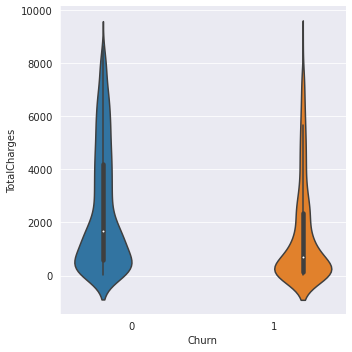

In [34]:
sns.catplot(data = df_train[['Churn', 'TotalCharges']], kind='violin', y='TotalCharges', x='Churn', hue='Churn')

### 2.- Feature Selection

#### We are gonna use filter methods for individual predictors.
Categorical variables:
*  Mutual Information

Continuous Variables:
 * Pearson correlation

#### Categorical:

In [35]:
df_cat = df_train[cat_vars]

In [36]:
from sklearn.feature_selection import mutual_info_classif

In [37]:
sc_class = {}
for cat in cat_vars:
    mi_class = mutual_info_classif(df_train.Churn.values.reshape(-1,1), df_train[cat].values, random_state=3)
    print(cat, ': ', mi_class)
    sc_class[cat] = mi_class


gender :  [0]
Partner :  [0]
Dependents :  [0.00543624]
PhoneService :  [0.00646404]
MultipleLines :  [0.00696207]
InternetService :  [0.05424745]
OnlineSecurity :  [0.07206024]
OnlineBackup :  [0.05995871]
DeviceProtection :  [0.04852635]
TechSupport :  [0.0686577]
StreamingTV :  [0.04111058]
StreamingMovies :  [0.04586247]
Contract :  [0.1046228]
PaperlessBilling :  [0.01966097]
PaymentMethod :  [0.03926709]
SeniorCitizen :  [0.01139088]


In [38]:
pd.Series(sc_class).sort_values(ascending=False)

Contract              [0.1046228003561771]
OnlineSecurity       [0.07206023619817659]
TechSupport          [0.06865770022049866]
OnlineBackup         [0.05995870804799419]
InternetService      [0.05424745028378575]
DeviceProtection     [0.04852634922056476]
StreamingMovies     [0.045862465024293364]
StreamingTV          [0.04111058167698012]
PaymentMethod        [0.03926709260613892]
PaperlessBilling    [0.019660971000969862]
SeniorCitizen       [0.011390883473546554]
MultipleLines       [0.006962073994550622]
PhoneService        [0.006464042590870411]
Dependents          [0.005436239084791072]
gender                                 [0]
Partner                                [0]
dtype: object

#### Important feats: MI > 0.05

#### Continuous:

In [39]:
cont_vars = list(df_train.select_dtypes(float).columns) + list(df_train.select_dtypes(int).columns)

In [40]:
cont_vars.remove('Churn')

In [41]:
cont_vars.remove('SeniorCitizen')

In [42]:
cont_vars

['MonthlyCharges', 'TotalCharges', 'tenure']

In [43]:
df_train[cont_vars].corrwith(df_train.Churn)

MonthlyCharges    0.192238
TotalCharges     -0.191455
tenure           -0.345271
dtype: float64

### Selected Variables:
* Contract
* OnlineSecurity
* TechSupport
* OnlineBackup
* InternetService
* MonthlyCharges
* TotalCharges
* tenure

#### Convert df_train to Dict Vectorizer: One Hot Encoding for categorical but including raw numerical values

In [44]:
from sklearn.feature_extraction import DictVectorizer

In [45]:
sel_vars = ['Contract',
                   'OnlineSecurity',
                   'TechSupport',
                   'OnlineBackup',
                   'InternetService',
                   'MonthlyCharges',
                   'TotalCharges',
                   'tenure']

In [46]:
df_sel_train = df_train[sel_vars]

In [47]:
dic_train = df_sel_train.to_dict(orient='records')

In [48]:
dv = DictVectorizer(sparse=False)

In [49]:
X_train = dv.fit_transform(dic_train)

In [50]:
# Val set

In [51]:
df_sel_val = df_val[sel_vars]

In [52]:
dic_val = df_sel_val.to_dict(orient='records')

In [53]:
dv = DictVectorizer(sparse=False)

In [54]:
X_val = dv.fit_transform(dic_val)

### 3.- Variables and models comparison

#### First we compare Log Reg with selected variables and all variables

In [55]:
y_train = df_train.Churn
y_val = df_val.Churn

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

#### Selected Variables:

In [58]:
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = lr.predict(X_val)

In [60]:
# Accuracy:
(y_val == y_pred).mean()

0.814498933901919

#### Coefficient values:

In [61]:
for name, coef in zip(dv.get_feature_names_out(), lr.coef_[0]):
    print(name, ': ', coef)

Contract=Month-to-month :  0.5962467220548074
Contract=One year :  -0.30870734355919444
Contract=Two year :  -0.7058170947927203
InternetService=DSL :  -0.4138421949033652
InternetService=Fiber optic :  0.3332579130290255
InternetService=No :  -0.33769343447122174
MonthlyCharges :  -4.665633017279306e-05
OnlineBackup=No :  0.0452310154783891
OnlineBackup=No internet service :  -0.33769343447122174
OnlineBackup=Yes :  -0.1258152973098374
OnlineSecurity=No :  0.1997353597639581
OnlineSecurity=No internet service :  -0.33769343447122174
OnlineSecurity=Yes :  -0.2803196416567396
TechSupport=No :  0.10017658761824462
TechSupport=No internet service :  -0.33769343447122174
TechSupport=Yes :  -0.18076086943599057
TotalCharges :  0.0003567258154813834
tenure :  -0.05667008178599705


An important thing to notice is that we can make sense of these values taking into account the numerical variable magnitudes, for example tenure and Charges, and categorical 0s and 1s values.

#### All variables:

In [62]:
df_all_train = df_train[cat_vars + cont_vars]

In [63]:
dic_all_train = df_all_train.to_dict(orient='records')

In [64]:
dv = DictVectorizer(sparse=False)

In [65]:
X_train_all = dv.fit_transform(dic_all_train)

In [66]:
df_all_val = df_val[cat_vars + cont_vars]

In [67]:
dic_all_val = df_all_val.to_dict(orient='records')

In [68]:
dv = DictVectorizer(sparse=False)

In [69]:
X_val_all = dv.fit_transform(dic_all_val)

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train_all, y_train)

/home/saul/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
y_pred = lr.predict(X_val_all)

In [73]:
# Accuracy all vars:
(y_val == y_pred).mean()

0.8109452736318408

There is not so much difference using all and selected variables

#### Comparing with Decision Trees and RF

In [74]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [75]:
et = ExtraTreesClassifier()

In [76]:
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [77]:
y_pred = et.predict(X_val)

In [78]:
## Accuracy DT
(y_val == y_pred).mean()

0.7739872068230277

In [79]:
rf = RandomForestClassifier()

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
y_pred = rf.predict(X_val)

In [82]:
## Accuracy RF
(y_val == y_pred).mean()

0.7810945273631841

#### Future Work:
Experiments for obtaining the best model using more classifiers